### 판매 분석

In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving mysql.json to mysql (1).json


In [ ]:
import json
with open(filename) as fp:
    config_str = fp.read()
config = json.loads(config_str)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [ ]:
!pip install pymysql > /dev/null

In [ ]:
# db 모듈을 가져옴 
import db_module as dm

### 1. 월별 매출/ 이익

In [ ]:
results = dm.get_monthly(config)
df = pd.DataFrame(results, columns=['월','매출','이익'])
df.set_index('월', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,매출,이익
월,,
01,14070100,1256960
02,17884600,1656940
03,16806100,1576250
04,17143700,1672430
05,15607000,1456680
06,15963200,1614780
07,17085000,1837340
08,16331100,1705980
09,16034700,1680690


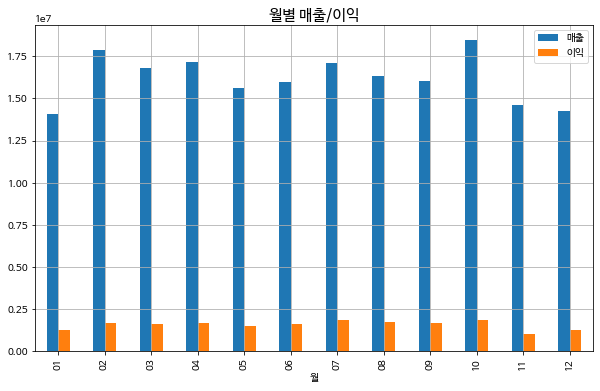

In [ ]:
df.plot.bar(figsize=(10,6))
plt.title('월별 매출/이익', size= 15)
plt.grid()
plt.show()

### 2. 거래처별 매출/이익

In [ ]:
# 소수점 자리 제한을 위한 코드
pd.options.display.float_format= '{:.2}'.format

In [ ]:
results = dm.get_company(config)
df = pd.DataFrame(results, columns=['거래처','매출','이익'])
df.set_index('거래처', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익률'] = df.이익 / df.매출 * 100
df

,매출,이익,이익률
거래처,,,
일룸,32064500,3145020,9.808417
리바트,41008000,3558590,8.677795
오늘의집,42066700,3563120,8.470168
한셈,36967800,3732880,10.097653
굿인테리어,42148000,4556080,10.809718


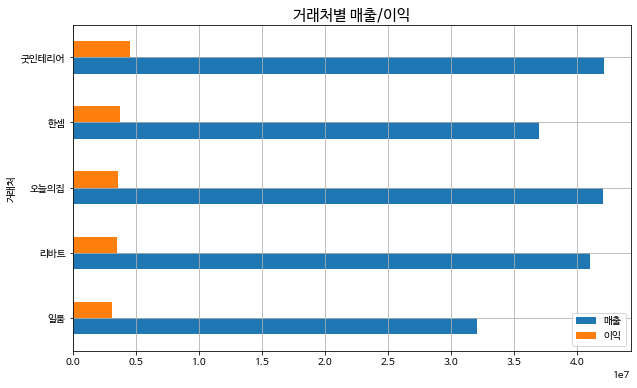

In [ ]:
df[['매출','이익']].plot.barh(figsize=(10,6))
plt.title('거래처별 매출/이익', size= 15)
plt.grid()
plt.show()

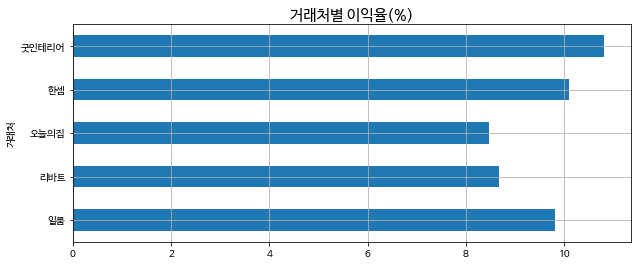

In [ ]:
df['이익률'].plot.barh(rot=0, figsize=(10,4))
plt.title('거래처별 이익율(%)', size=15)
plt.grid()
plt.show()

### 3. 거래처별 판매제품 및 수량

In [ ]:
results = dm.get_product_list(config)
df = pd.DataFrame(results, columns=['거래처', '상품', '수량'])
df.set_index(['거래처','상품'], inplace=True)
df['수량'] =df.수량.astype(int)
df

수량
거래처   상품      
굿인테리어 거울    49
      나이프   34
      도시락통   8
      병     80
      샤워기    8
...         ..
한셈    침대    67
      캔     33
      컵     13
      포크    21
      휴지걸이  11

[132 rows x 1 columns]

In [ ]:
df.reset_index()['거래처'].unique()

array(['굿인테리어', '리바트', '오늘의집', '일룸', '한셈'], dtype=object)

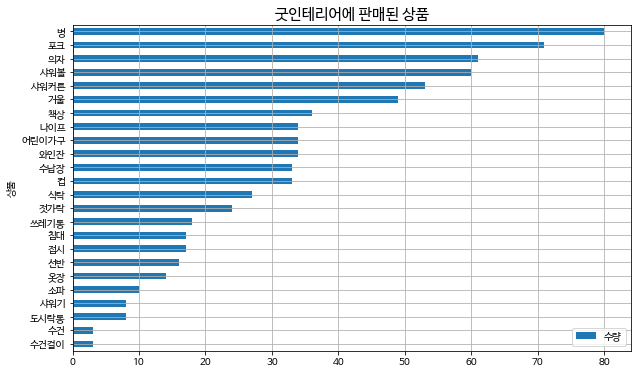

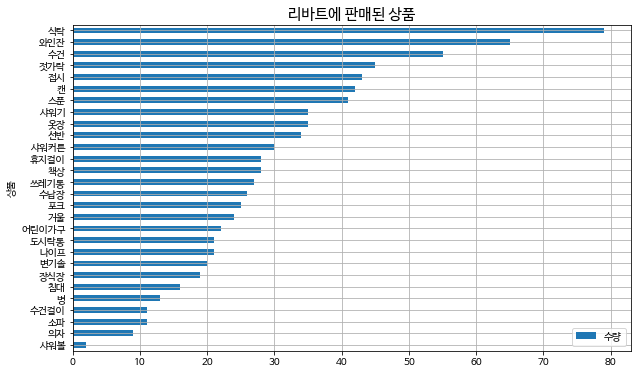

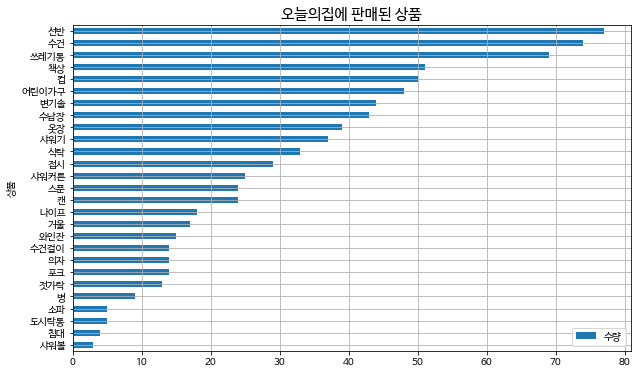

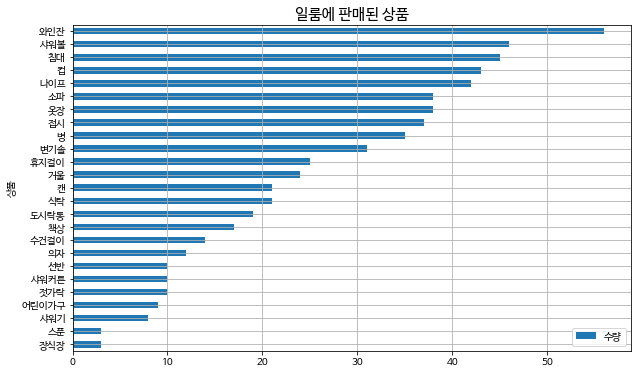

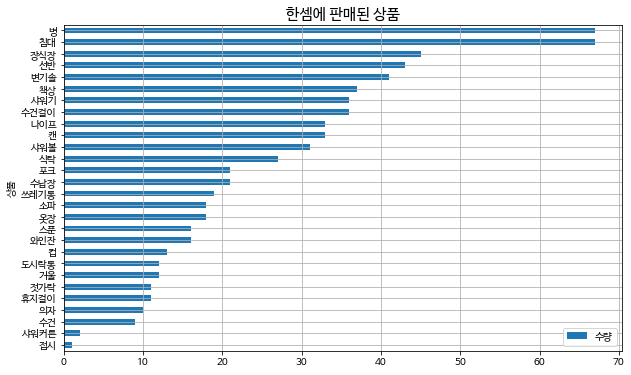

In [ ]:
# 각 회사의 제품
for company in df.reset_index()['거래처'].unique():
  sdf = df.loc[(company,)]
  sdf.sort_values(by='수량').plot.barh(figsize=(10,6))
  plt.title(f'{company}에 판매된 상품', size =15)
  plt.grid()
  plt.show()

#### 4. 제품별 매출액, 이익

In [ ]:
results = dm.get_products(config)
df = pd.DataFrame(results,columns=['제품','판매수량','매출','이익'])
df.set_index('제품', inplace=True)
df['판매수량'] = df.astype(int)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,판매수량,매출,이익
제품,,,
휴지걸이,64,3776000,377600
도시락통,65,5557500,278200
장식장,67,2204300,220430
수건걸이,78,1060800,63960
소파,82,2222200,266500
스푼,84,3780000,151200
젓가락,103,5407500,702460
의자,106,2883200,201400
어린이가구,113,2847600,170630


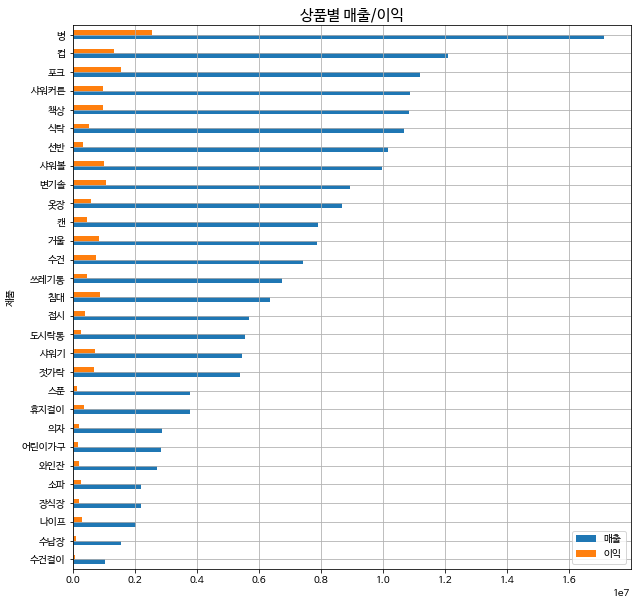

In [ ]:
df[['매출','이익']].sort_values(by='매출').plot.barh(rot=0, figsize=(10,10))
plt.title ('상품별 매출/이익', size= 15)
plt.grid()
plt.show()

#### 카테고리별 매출/이익

In [ ]:
results = dm.get_category(config)
df = pd.DataFrame(results, columns=['카테고리','매출','이익'])
df.set_index('카테고리', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익율'] = df.이익 / df.매출 * 100
df

,매출,이익,이익율
카테고리,,,
주방용품,73576700,7974080,10.837779
욕실용품,65318600,6475680,9.913991
가구,55359700,4105930,7.416821


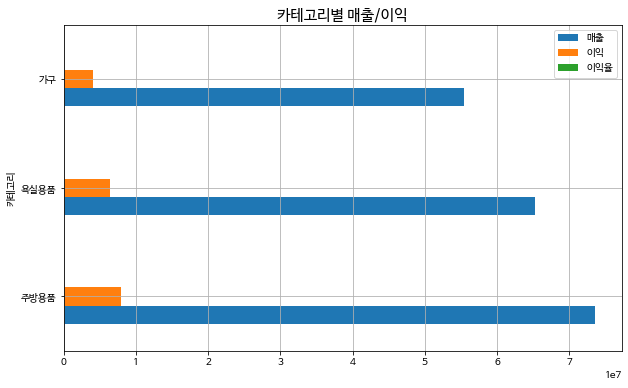

In [ ]:
df.plot.barh(figsize=(10,6))
plt.title('카테고리별 매출/이익', size= 15)
plt.grid()
plt.show()